# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + str(weather_api_key) + "&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizwa
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | many
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | linhares
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | beitbridge
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | zaltan
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | outlook
Processing Record 21 of Set 1 | taganak
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | longyearbyen
Processin

Processing Record 39 of Set 4 | yaan
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | porbandar
Processing Record 42 of Set 4 | marsa matruh
Processing Record 43 of Set 4 | portobelo
Processing Record 44 of Set 4 | eenhana
Processing Record 45 of Set 4 | alta floresta
Processing Record 46 of Set 4 | pandan
Processing Record 47 of Set 4 | oktyabrskiy
Processing Record 48 of Set 4 | maniitsoq
Processing Record 49 of Set 4 | locri
Processing Record 0 of Set 5 | hirtshals
Processing Record 1 of Set 5 | komsomolskiy
Processing Record 2 of Set 5 | aguimes
Processing Record 3 of Set 5 | salvador
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | virginia beach
Processing Record 6 of Set 5 | madimba
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | sisimiut
Processing Record 9 of Set 5 | chokurdakh
Processing Record 10 of Set 5 | san onofre
Processing Record 11 of Set 5 | aklavik
Processing Record 12 of Set 5 | viedma
Processing

Processing Record 30 of Set 8 | haian
Processing Record 31 of Set 8 | aflu
City not found. Skipping...
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | puerto asis
Processing Record 35 of Set 8 | gilgit
Processing Record 36 of Set 8 | panzhihua
Processing Record 37 of Set 8 | canete
Processing Record 38 of Set 8 | pocatky
Processing Record 39 of Set 8 | myitkyina
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | mahibadhoo
Processing Record 42 of Set 8 | gamba
Processing Record 43 of Set 8 | statesville
Processing Record 44 of Set 8 | spokane
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | cabo rojo
Processing Record 47 of Set 8 | tubarao
Processing Record 48 of Set 8 | sungai padi
Processing Record 49 of Set 8 | rio cuarto
Processing Record 0 of Set 9 | shuangyang
Processing Record 1 of Set 9 | ponta delgada
Processing Record 2 of Set 9 | rio grande
Processing Record 3 of S

Processing Record 15 of Set 12 | broken hill
Processing Record 16 of Set 12 | katsuura
Processing Record 17 of Set 12 | calbuco
Processing Record 18 of Set 12 | quebrangulo
Processing Record 19 of Set 12 | dudinka
Processing Record 20 of Set 12 | visnes
Processing Record 21 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 22 of Set 12 | karaman
Processing Record 23 of Set 12 | pestravka
Processing Record 24 of Set 12 | new glasgow
Processing Record 25 of Set 12 | bud
Processing Record 26 of Set 12 | melaka
Processing Record 27 of Set 12 | mindelo
Processing Record 28 of Set 12 | mackay
Processing Record 29 of Set 12 | katherine
Processing Record 30 of Set 12 | phuket
Processing Record 31 of Set 12 | aktas
Processing Record 32 of Set 12 | kristiansund
Processing Record 33 of Set 12 | sistranda
Processing Record 34 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 35 of Set 12 | kamaishi
Processing Record 36 of Set 12 | treinta y tres
Processing R

In [5]:
print(len(city_data))

581


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizwa,22.9333,57.5333,23.12,54,40,1.22,OM,1682373037
1,ushuaia,-54.8000,-68.3000,3.81,93,100,1.54,AR,1682372819
2,punta arenas,-53.1500,-70.9167,7.06,100,100,5.66,CL,1682373038
3,jamestown,42.0970,-79.2353,6.77,63,100,5.14,US,1682373038
4,rikitea,-23.1203,-134.9692,26.14,86,81,6.78,PF,1682373039


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

stringtime = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", stringtime)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nizwa,22.9333,57.5333,23.12,54,40,1.22,OM,1682373037
1,ushuaia,-54.8000,-68.3000,3.81,93,100,1.54,AR,1682372819
2,punta arenas,-53.1500,-70.9167,7.06,100,100,5.66,CL,1682373038
3,jamestown,42.0970,-79.2353,6.77,63,100,5.14,US,1682373038
4,rikitea,-23.1203,-134.9692,26.14,86,81,6.78,PF,1682373039


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
def make_my_scatter_plot():
    x = city_data_df['Lat']
    plt.scatter(x,y)
    plt.xlabel('Latitude')
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid()

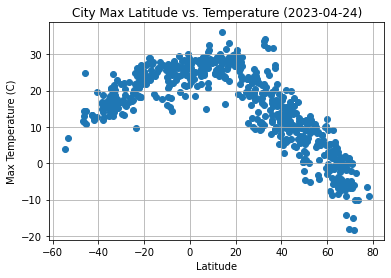

In [11]:
# Build scatter plot for latitude vs. temperature
y = city_data_df['Max Temp']
ylab = "Max Temperature (C)"
title = "City Max Latitude vs. Temperature (" + date + ")"

# Incorporate the other graph properties
# YOUR CODE HERE
make_my_scatter_plot()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

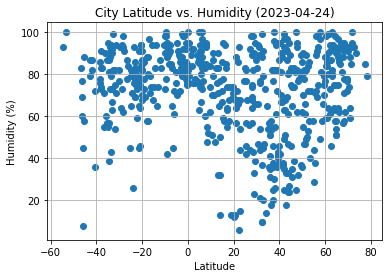

In [12]:
# Build the scatter plots for latitude vs. humidity
y = city_data_df['Humidity']
ylab = "Humidity (%)"
title = "City Latitude vs. Humidity (" + date + ")"
# Incorporate the other graph properties
# YOUR CODE HERE
make_my_scatter_plot()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

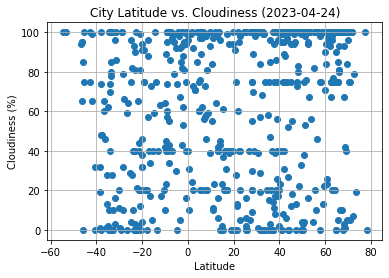

In [13]:
# Build the scatter plots for latitude vs. cloudiness
y = city_data_df['Cloudiness']
ylab = "Cloudiness (%)"
title = "City Latitude vs. Cloudiness (" + date + ")"
# Incorporate the other graph properties
# YOUR CODE HERE
make_my_scatter_plot()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

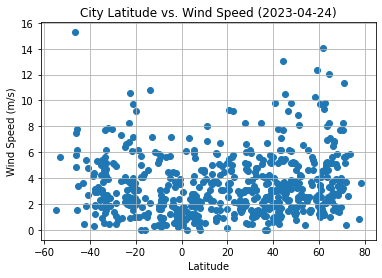

In [14]:
# Build the scatter plots for latitude vs. wind speed
y = city_data_df['Wind Speed']
ylab = "Wind Speed (m/s)"
title = "City Latitude vs. Wind Speed (" + date + ")"
# Incorporate the other graph properties
# YOUR CODE HERE
make_my_scatter_plot()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linreg_maker() :
    x = hemisphere['Lat']
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xy=loc,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid()
    print(f"The r-value is: {rvalue**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nizwa,22.9333,57.5333,23.12,54,40,1.22,OM,1682373037
3,jamestown,42.0970,-79.2353,6.77,63,100,5.14,US,1682373038
6,many,31.5688,-93.4841,21.69,44,29,3.36,US,1682373039
8,port hardy,50.6996,-127.4199,9.10,81,75,2.57,CA,1682373040
14,la ronge,55.1001,-105.2842,10.12,29,100,6.17,CA,1682373041


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,3.81,93,100,1.54,AR,1682372819
2,punta arenas,-53.1500,-70.9167,7.06,100,100,5.66,CL,1682373038
4,rikitea,-23.1203,-134.9692,26.14,86,81,6.78,PF,1682373039
5,busselton,-33.6500,115.3333,12.94,79,100,5.63,AU,1682373039
7,bluff,-46.6000,168.3333,11.56,83,94,15.27,NZ,1682373039


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7962508919082258


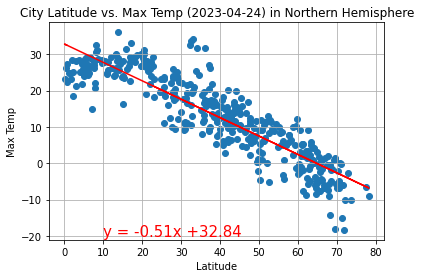

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
hemisphere = northern_hemi_df
y = hemisphere['Max Temp']
ylab = "Max Temp"
loc = (10,-20)
title = "City Latitude vs. Max Temp (" + date + ") in Northern Hemisphere"
linreg_maker()

The r-value is: 0.5473755201759529


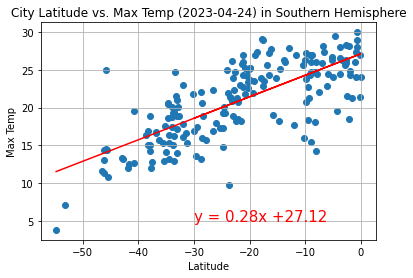

In [36]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
hemisphere = southern_hemi_df
y = hemisphere['Max Temp']
ylab = "Max Temp"
loc = (-30,5)
title = "City Latitude vs. Max Temp (" + date + ") in Southern Hemisphere"
linreg_maker()

**Discussion about the linear relationship:** As the latitude approaches 0 from the negative, the Max Temp rises. As the latitude continues further into the positive The Max Temp returns back down.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005202596099376523


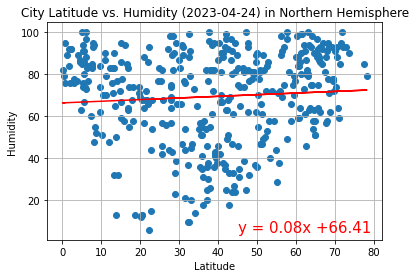

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
hemisphere = northern_hemi_df
y = hemisphere['Humidity']
ylab = "Humidity"
loc = (45,5)
title = "City Latitude vs. Humidity (" + date + ") in Northern Hemisphere"
linreg_maker()

The r-value is: 0.5473755201759529


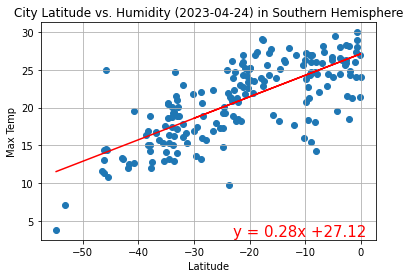

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
hemisphere = southern_hemi_df
y = hemisphere['Max Temp']
ylab = "Max Temp"
loc = (-23,3)
title = "City Latitude vs. Humidity (" + date + ") in Southern Hemisphere"
linreg_maker()

**Discussion about the linear relationship:** Below 0, there is a direct and positive correlation between latitude and max temp, with one rising with the other. Above a latitude of 0, there is no strong relationship as humidity remains quite random.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013310033763768998


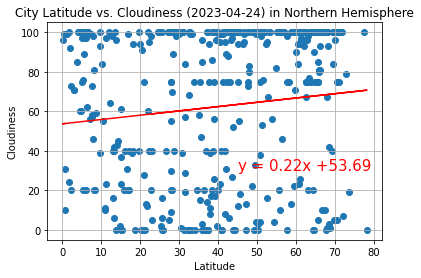

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
hemisphere = northern_hemi_df
y = hemisphere['Cloudiness']
ylab = "Cloudiness"
loc = (45,30)
title = "City Latitude vs. Cloudiness (" + date + ") in Northern Hemisphere"
linreg_maker()

The r-value is: 0.015916849241159145


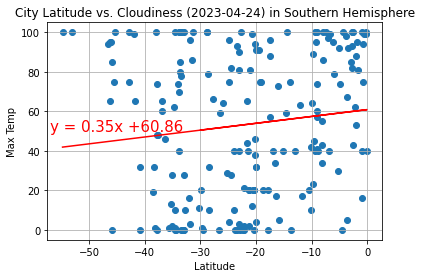

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
hemisphere = southern_hemi_df
y = hemisphere['Cloudiness']
ylab = "Max Temp"
loc = (-57,50)
title = "City Latitude vs. Cloudiness (" + date + ") in Southern Hemisphere"
linreg_maker()

**Discussion about the linear relationship:** There is almost no correlation between city latitude and cloudiness. There does not seem to be a relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05199159779343702


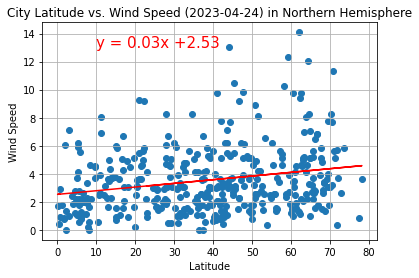

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
hemisphere = northern_hemi_df
y = hemisphere['Wind Speed']
ylab = "Wind Speed"
loc = (10,13)
title = "City Latitude vs. Wind Speed (" + date + ") in Northern Hemisphere"
linreg_maker()

The r-value is: 0.061733217292295244


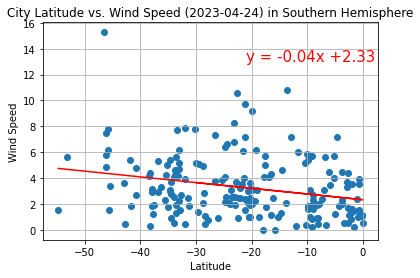

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
hemisphere = southern_hemi_df
y = hemisphere['Wind Speed']
ylab = "Wind Speed"
loc = (-21,13)
title = "City Latitude vs. Wind Speed (" + date + ") in Southern Hemisphere"
linreg_maker()

**Discussion about the linear relationship:** There is almost no correlation between city latitude and wind speed.